In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord as coord
import astropy.units as u

###  Used CHIME catalogue for this part

In [2]:
col_names = ['tns_name', 'ra', 'dec', 'bonsai_dm', 'width_fitb', 'flux']
chime_df = pd.read_csv('chimefrbcat1.csv',  usecols=col_names)

In [3]:
chime_df.head()

,tns_name,ra,dec,bonsai_dm,flux,width_fitb
0,FRB20180725A,93.42,67.07,716.6,1.70,0.000296
1,FRB20180727A,197.72,26.42,642.1,0.58,0.00139
2,FRB20180729A,199.40,55.58,108.4,11.70,<0.00010
3,FRB20180729B,89.93,56.50,318.6,0.92,0.000314
4,FRB20180730A,57.39,87.19,849.2,5.20,0.000468


Text(0.5, 1.0, 'FRB positions in the sky')

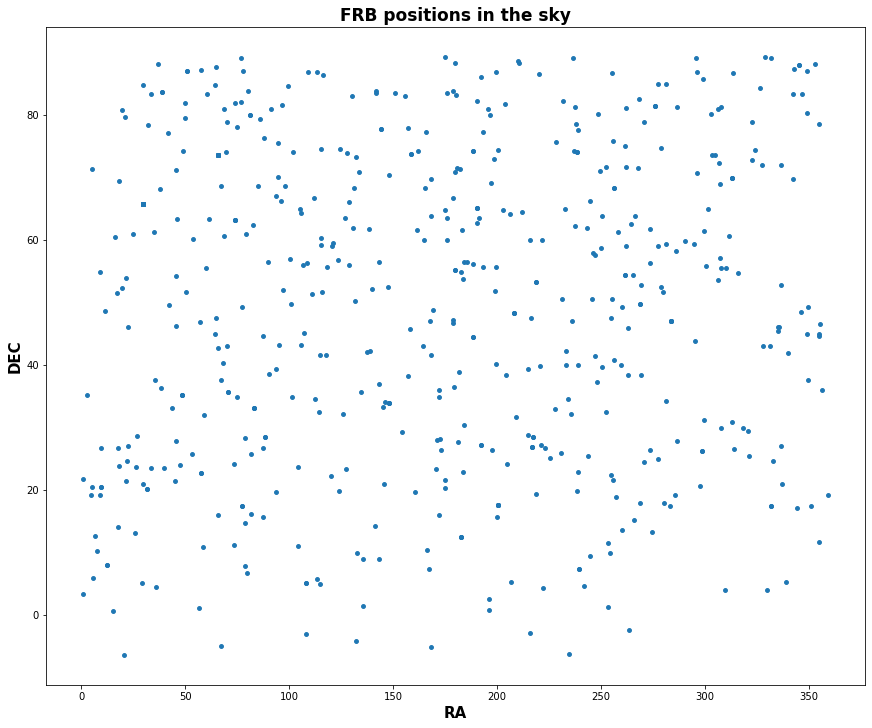

In [4]:
fig, ax_position = plt.subplots(figsize = (12, 10), layout = 'constrained')
ax_position.scatter(chime_df['ra'], chime_df['dec'], s = 15)
ax_position.set_xlabel('RA', size = 15, weight = 'bold')
ax_position.set_ylabel('DEC', size = 15, weight = 'bold')
ax_position.set_title('FRB positions in the sky', size = 17, weight = 'bold')

Position map of FRBs show that they are uniformly ditributed all over the sky which indicates that FRB sources are located all over the sky. Since these data are taken by CHIME(Canadian radio telescope) it covers northern sky only. 

### Used HeRTA catalogue from here onwards

In [7]:
# Use this data frame only to check the data and its characteristics and this box is independent to any other code 
# boxes below.

df = pd.read_csv('herta_frb_catalogue.csv')

In [8]:
columns = ['ra', 'dec', 'dm', 'flux', 'redshift', 'frb', 'l', 'b', 'width', 'fluence']
herta_df = pd.read_csv('herta_frb_catalogue.csv', usecols=columns).replace('-', '0')
print('No of Rows =', herta_df.shape[0])
herta_df.head(3)

No of Rows = 806


,frb,ra,dec,l,b,dm,flux,width,fluence,redshift
0,FRB 20010125A,19:06:53,-40:37:14,356.64,-20.02,790.3,0.54,0,0,0.7083
1,FRB 20010305A,4:57:20,-52:36:25,260.07,-38.35,350.0,0.42,9,3.78,0.341
2,FRB 20010312A,5:26:55,-64:56:19,274.72,-33.30,1187.0,0.25,0,0,1.0897


Text(0.5, 1.0, 'Position of FRB sources in the sky')

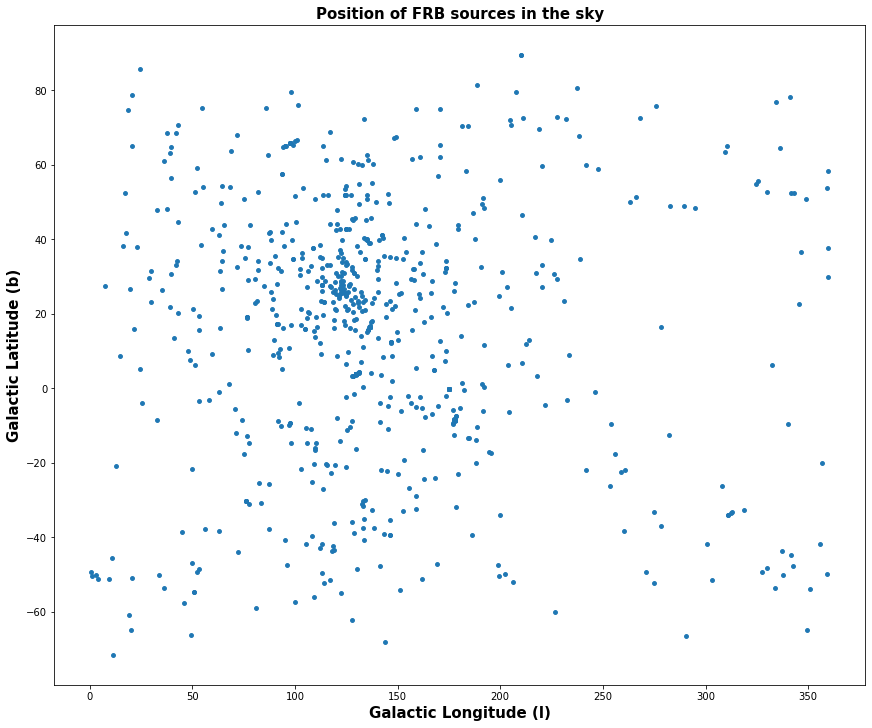

In [4]:
figure, ax_herta_pos = plt.subplots(figsize = (12,10), layout = 'constrained')
ax_herta_pos.scatter(herta_df['l'], herta_df['b'], s = 15)
ax_herta_pos.set_xlabel('Galactic Longitude (l)',  size = 15, weight = 'bold')
ax_herta_pos.set_ylabel('Galactic Latitude (b)', size = 15, weight = 'bold')
ax_herta_pos.set_title('Position of FRB sources in the sky', size = 15, weight = 'bold')

Unlike data from CHIME, it shows clustering of sources at ~30 North latitude and ~120 east longitutde. Is there any reason for clustering of sources at this location?

####  Flux Histogram

In [5]:
print('The maximum dispersion measure in the catalog is: ', max(herta_df['dm']))
print('The minimum dispersion measure in the catalog is: ', min(herta_df['dm']))

The maximum dispersion measure in the catalog is:  3037.7
The minimum dispersion measure in the catalog is:  87.75


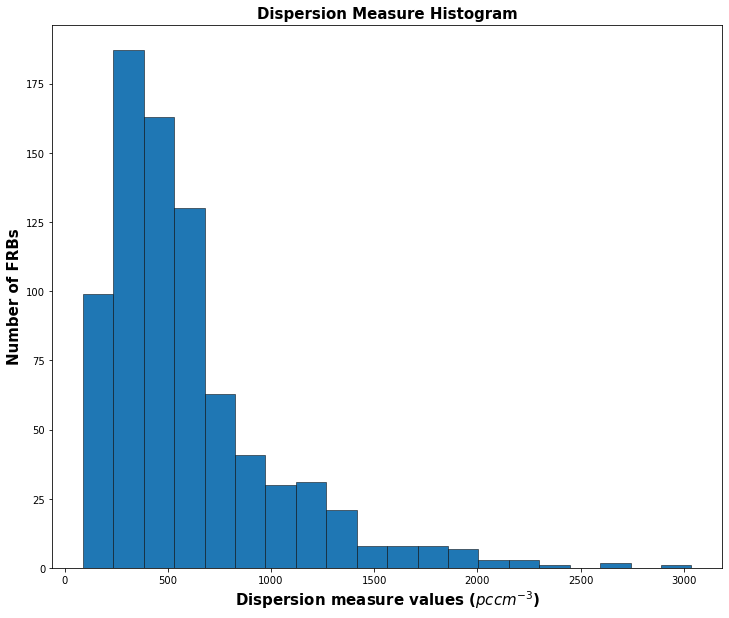

In [6]:
fig, ax_dm_hist = plt.subplots(figsize = (12, 10))
ax_dm_hist.hist(herta_df['dm'], bins=20, linewidth=0.5, edgecolor="black")
ax_dm_hist.set_xlabel('Dispersion measure values ($pc cm^{-3}$)', size = 15, weight = 'bold')
ax_dm_hist.set_ylabel('Number of FRBs', size = 15, weight = 'bold')
ax_dm_hist.set_title('Dispersion Measure Histogram', size = 15, weight = 'bold')
plt.show()

Here, most of the FRB sources detected are below 600 DM values. Does this have any connection with the clustering of FRB sources as in previous plot?  

This plot can be made more informative by picking proper range for DM values. But I don't have idea on what range of DM values are astronomically significant? Also, DM tells us about the distance of the source so there are some FRB sources detected quite far away. Maybe once we have sensitive eough equipment we will be able to detect more source from far away universe.

### Flux Histogram

In [5]:
flux_data = herta_df['flux'].astype(float) # Converted data values from string to float 

# Creating a data series dropping all 0 flux values.

flux_value = []
for k in flux_data:
    if k != 0:
        m = np.log(k)
        flux_value.append(m)
print(len(flux_value))

653


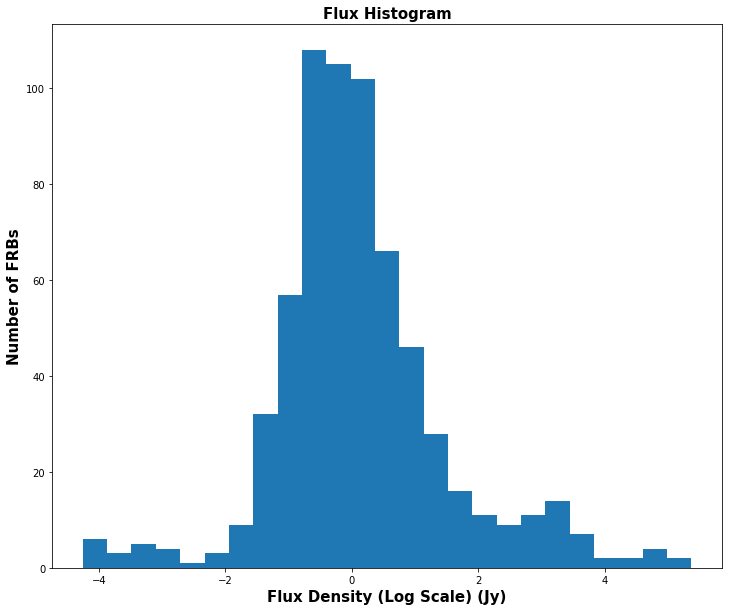

In [6]:
fig, ax_flux = plt.subplots(figsize = (12,10)) 
ax_flux.hist(flux_value, bins = 25)
ax_flux.set_xlabel('Flux Density (Log Scale) (Jy)', size = 15, weight = 'bold')
ax_flux.set_ylabel('Number of FRBs', size = 15, weight = 'bold')
ax_flux.set_title('Flux Histogram', size = 15, weight = 'bold')
plt.show()


### Flux Density Vs Dispersion Measure Scatter Plot

In [17]:

dm_flux_raw = herta_df[['flux', 'dm']].set_index('flux').drop('0', 0)
flux_val = dm_flux_raw.index.astype(float)
dm_val = dm_flux_raw['dm'].values
x_dm = np.log(dm_val)
y_flux = np.log(flux_val)

/tmp/ipykernel_3776/3822948998.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dm_flux_raw = herta_df[['flux', 'dm']].set_index('flux').drop('0', 0)


Text(0.5, 1.0, 'Flux Vs DM')

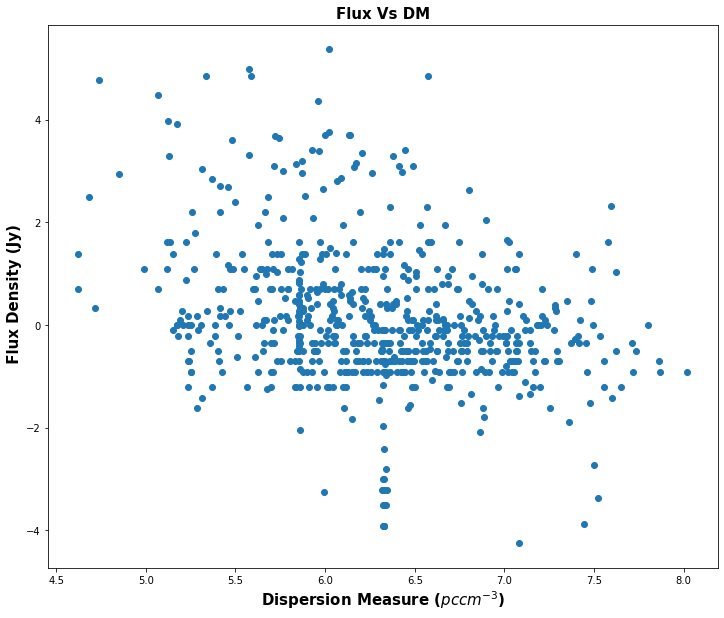

In [8]:
fig, ax_dm_fluc = plt.subplots(figsize = (12, 10))
ax_dm_fluc.scatter(x_dm, y_flux)
ax_dm_fluc.set_xlabel('Dispersion Measure ($pc cm^{-3}$)', size = 15, weight = 'bold')
ax_dm_fluc.set_ylabel(' Flux Density (Jy)', size = 15, weight = 'bold')
ax_dm_fluc.set_title('Flux Vs DM', size = 15, weight = 'bold')

### DM Vs pulse width scatter plot

In [16]:
dm_width_raw = herta_df[['width', 'dm']].set_index('width').drop('0', 0)
width_val = dm_width_raw.index.astype(float)
dm_val = dm_width_raw['dm'].values
x_dm = np.log(dm_val)
y_width = np.log(width_val)

/tmp/ipykernel_3776/1888869630.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dm_width_raw = herta_df[['width', 'dm']].set_index('width').drop('0', 0)


Text(0.5, 1.0, 'Burst width Vs DM')

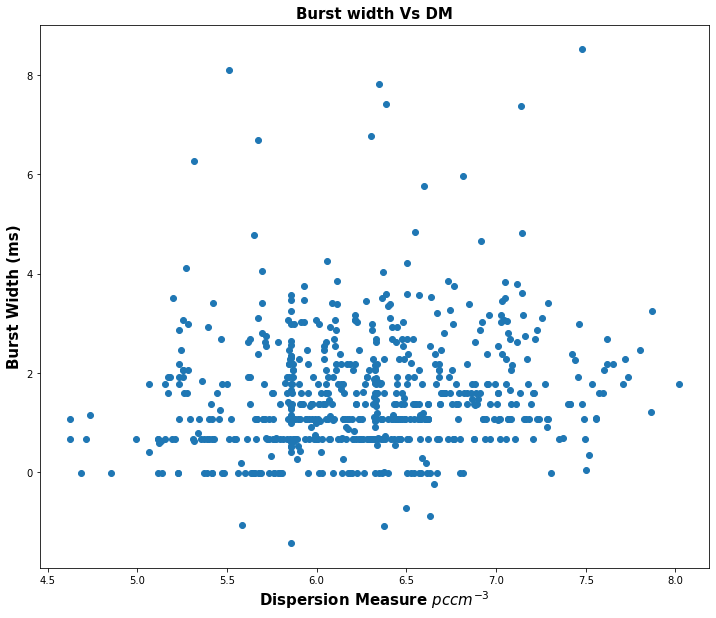

In [15]:
fig, ax_dm_width = plt.subplots(figsize = (12, 10))
ax_dm_width.scatter(x_dm, y_width)
ax_dm_width.set_xlabel('Dispersion Measure $pc cm^{-3}$', size = 15, weight = 'bold')
ax_dm_width.set_ylabel('Burst Width (ms)', size = 15, weight = 'bold')
ax_dm_width.set_title('Burst width Vs DM', size = 15, weight = 'bold')

### Flux Vs Redshift

In [53]:
x_rshift = []
y_flux = []
for k in herta_df[['redshift', 'flux']].values:
    m = np.log(float(k[0]))
    n = np.log(float(k[1]))
    if m !=0 and n!=0:
        x_rshift.append(m)
        y_flux.append(n)

/tmp/ipykernel_3776/2866737205.py:5: RuntimeWarning: divide by zero encountered in log
  n = np.log(float(k[1]))
/tmp/ipykernel_3776/2866737205.py:4: RuntimeWarning: divide by zero encountered in log
  m = np.log(float(k[0]))


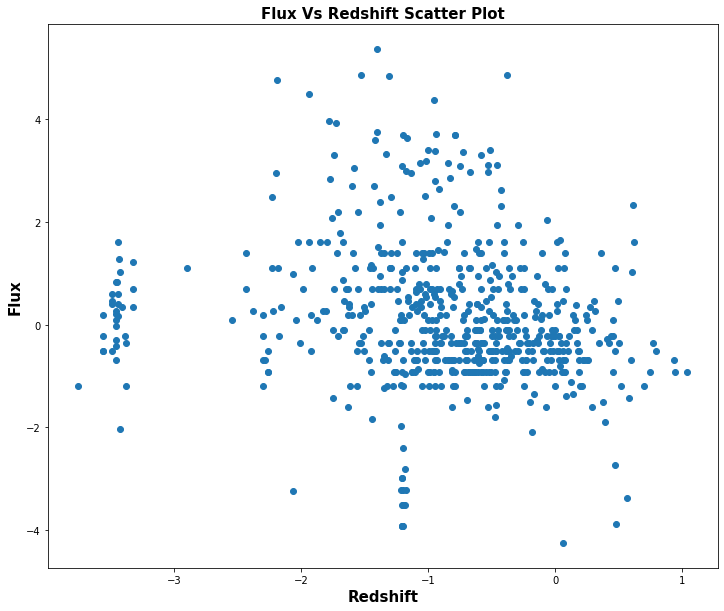

In [60]:
fig, ax_flux_rshift = plt.subplots(figsize = (12, 10))
ax_flux_rshift.scatter(x_rshift, y_flux)   # Both axes are in logarithmic scale.
ax_flux_rshift.set_xlabel('Redshift', size = 15, weight = 'bold')
ax_flux_rshift.set_ylabel('Flux', size = 15, weight = 'bold')
ax_flux_rshift.set_title('Flux Vs Redshift Scatter Plot', size = 15, weight = 'bold')
plt.show()

Does cluster in the left say something? 

### Aitoff Projection (Plotting FRB sources to a spherical projection map)

SkyCoordinate module from astropy library has functionality useful to deal with astonomical co-ordinate system.
Here I have defined gal variable which will take all values for lattitude and longitude in galactic coordinate 
system and use 'Skycoord' module to put it into galactic co-ordinate system. Two arguments 'frame' and 'unit' defines what kind of co-ordinate system to use and what unit the angle is measured in. 

In [73]:
x_l = herta_df['l']
y_b = herta_df['b']

gal = coord(x_l, y_b, frame='galactic', unit = 'deg')  # coord imported from Skycoordinate module

For some reason, aitoff' projection system seems to take values in radian. So, x and y co-ordinates that we are going to plot first needs to be converted to radian values. This is more accurately done by taking in-built functionality. 'gal.l.wrap_at('180d').radian' and 'gal.b.radian' used below with scatter function is basically converting X,Y coordinates into acceptable values for 'aitoff' projection.


In our case of data galactic co-ordinates (l,b) are already given in degree so we could have escaped the use of 'coord' function above but am still using it for the sake of accuracy and practice. However, there is one caveat, in our data latitude values are being measured from -90deg to +90deg as required in the projection map but longitude values are being specified in the range 0deg to 360deg. But the projection map has longitude extending from -180deg to +180deg. Use of 'coord' function will help us to easily convert the values acceptable in 'aitoff' projection plot. 

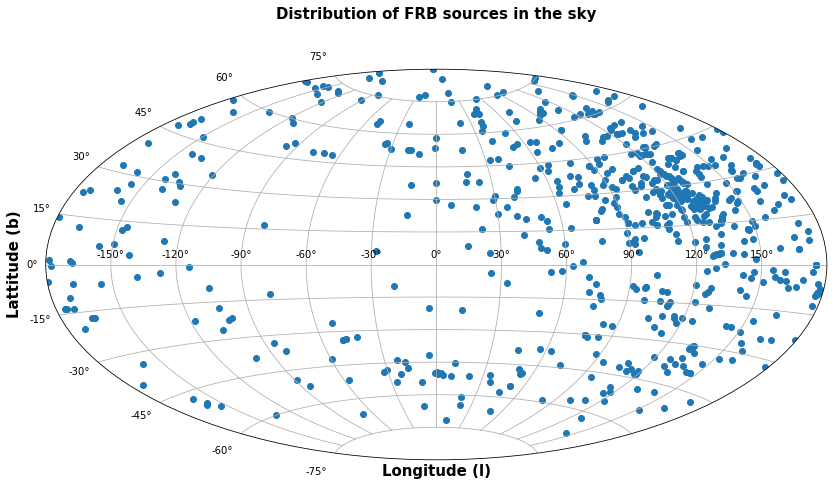

In [76]:
plt.figure(figsize = (14, 12))
plt.subplot(111, projection = 'aitoff')
plt.scatter(gal.l.wrap_at('180d').radian, gal.b.radian)
plt.xlabel('Longitude (l)', size = 15, weight = 'bold')
plt.ylabel('Lattitude (b)', size = 15, weight = 'bold')
plt.title('Distribution of FRB sources in the sky',pad = 50, size = 15, weight = 'bold')         
plt.grid(True)
plt.show()

### Doing it alternative way

Since our galactic latitude and longitude are given in degrees already and also that latitude coordinates are measured from -90deg to +90deg. However, longitude coordinates are from 0 to 360deg. We can first convert longitude values to put in the range of -180deg to +180deg. To do this,first we subtract 360 from all longitude values that are equal to or greater than 180. This will give us values distributed from -180deg to +180deg.

What we can do now is to multiply by a conversion facto to convert our coordinates into radian. Conversion factor to conver to radian is simply multiplying each value by pi/180. Below I have tried to make a sky map without taking any help from astropy library.

Also, I have used 'hammer' projection instead of 'aitoff' projection here. Both seem to work same way. 

In [83]:
x_coord = []
y_coord = herta_df['b']*((np.pi)/180)

for k in herta_df['l']:
    if k<180 or k == 180:
        n = k*((np.pi)/180)
        x_coord.append(n)
    if k >180:
        m = (k -360)*((np.pi)/180)
        x_coord.append(m)

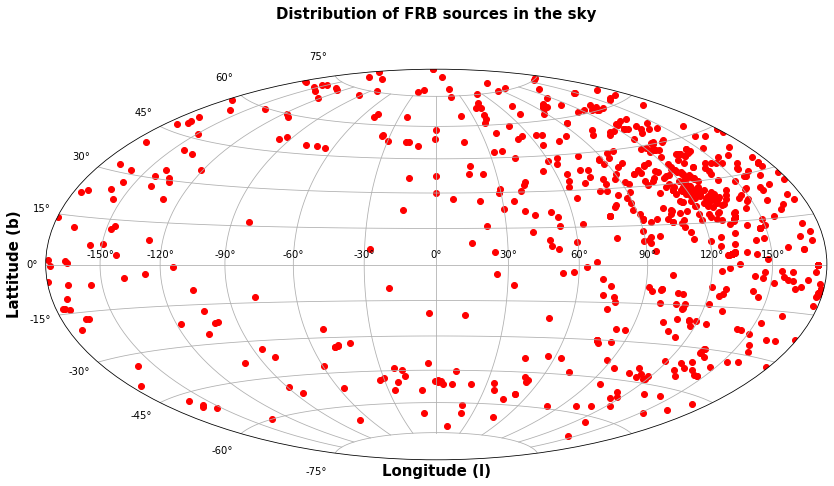

In [85]:
plt.figure(figsize = (14, 12))
plt.subplot(111, projection = 'hammer')
plt.scatter(x_coord, y_coord, color = 'red')
plt.grid(True)
plt.xlabel('Longitude (l)', size = 15, weight = 'bold')
plt.ylabel('Lattitude (b)', size = 15, weight = 'bold')
plt.title('Distribution of FRB sources in the sky',pad = 50, size = 15, weight = 'bold')         
plt.grid(True)
plt.show()

### Fluence Vs Redshift

In [52]:
x_fluence = []
y_flux = []
x = herta_df[['fluence', 'flux']]

for k in np.arange(0, len(x['fluence'])):
    if float(x['fluence'][k]) != 0 and float(x['flux'][k]) !=0:
        x_fluence.append(np.log(float(x['fluence'][k])))
        y_flux.append(np.log(float(x['flux'][k])))



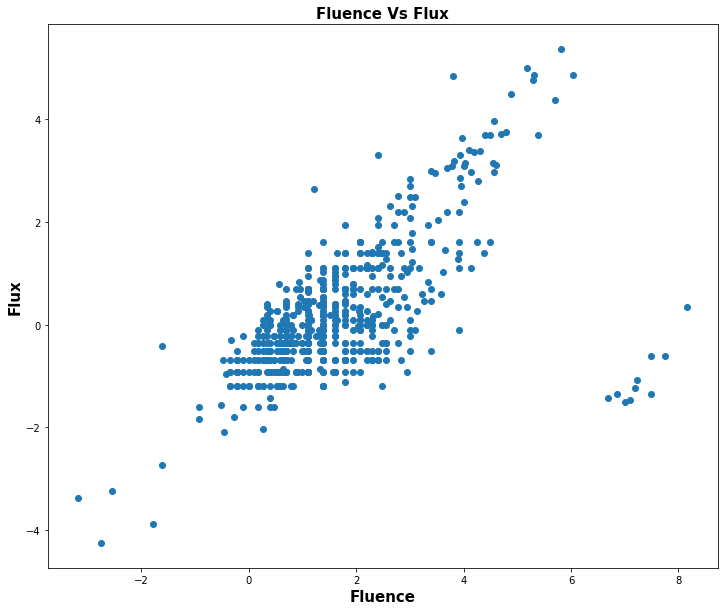

In [54]:
fig , ax_fluence_rshift = plt.subplots(figsize = (12, 10))
ax_fluence_rshift.scatter(x_fluence, y_flux)
ax_fluence_rshift.set_xlabel('Fluence', size = 15, weight = 'bold')
ax_fluence_rshift.set_ylabel('Flux', size = 15, weight = 'bold')
ax_fluence_rshift.set_title('Fluence Vs Flux', size = 15, weight = 'bold')
plt.show()

Flux and fluence refers to the similar physical parameter i.e. total electromagnetic energy from a source so should be corelated as seen from the graph. But small group of cluster in the graph needs some explanation. Are they just an outliers?